<a href="https://colab.research.google.com/github/AkankshaB123/python/blob/main/Data_Analysis_Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [40]:
df1 = pd.read_csv("/content/sample_data/student_performance_data.csv")

In [71]:
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_low,reading_low,writing_low
0,female,group B,bachelor's degree,standard,none,72,72,74,False,False,False
1,female,group C,some college,standard,completed,69,90,88,False,False,False
2,female,group B,master's degree,standard,none,90,95,93,False,False,False
3,male,group A,associate's degree,free/reduced,none,47,57,44,True,True,True
4,male,group C,some college,standard,none,76,78,75,False,False,False


# Student Performance Dataset Analysis

1. Parental Education level distribution for the top 10 and the bottom 10 students based on the highest aggregate score in math, reading and writing
2. Math Score distribution ( Binned in groups of 10 ) by gender and ethnicity
3. Lunch distribution for female and males
4. Pie chart distribution for ethnicity and gender
5. Number of students performing above average in Math and below average in both reading and writing
6. Find other patterns based on performance, and find what impacts Scores

In [72]:
#access math score, reading score, writing score column using loc
df1.loc[:,['math score','reading score','writing score']]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [73]:
#sum score values have individual columns and new column created with sum in a row-wise manner
df1.loc[:,['math score','reading score','writing score']].sum(axis=1)

,0
0,218
1,247
2,278
3,148
4,229
...,...
995,282
996,172
997,195
998,223


In [74]:
#below command with inplace to make it permanent
df1['aggregate_score'] = df1.loc[:,['math score','reading score','writing score']].sum(axis=1)
df1.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_low,reading_low,writing_low,aggregate_score
0,female,group B,bachelor's degree,standard,none,72,72,74,False,False,False,218
1,female,group C,some college,standard,completed,69,90,88,False,False,False,247


In [75]:
print((df1['parental level of education'].value_counts()/len(df1)*100).round(2).sort_values(ascending=False).astype(str) + '%')

parental level of education
some college          22.6%
associate's degree    22.2%
high school           19.6%
some high school      17.9%
bachelor's degree     11.8%
master's degree        5.9%
Name: count, dtype: object


In [76]:
df1.groupby(['parental level of education']).aggregate({'aggregate_score':['mean','min','max']})

aggregate_score          
                                       mean  min  max
parental level of education                          
associate's degree               208.707207   95  300
bachelor's degree                215.771186  117  300
high school                      189.290816   55  287
master's degree                  220.796610  134  293
some college                     205.429204   70  297
some high school                 195.324022   27  297

In [77]:
top_10_students = df1.sort_values(by='aggregate_score', ascending=False).head(10)
top_10_students.groupby(['parental level of education']).aggregate({'aggregate_score':['mean','sum','count']})

aggregate_score            
                                       mean   sum count
parental level of education                            
associate's degree                    300.0   300     1
bachelor's degree                     297.6  1488     5
master's degree                       293.0   293     1
some college                          296.5   593     2
some high school                      297.0   297     1

Insights - Top 10


*   The highest mean aggregate score among the top 10 comes from students whose parents have an associate's degree (mean = 300), though this appears to be based on very few students.
*   Bachelor's degree parents contribute the largest total score (sum=1488), indicating more top-performing students come from this group.
*   Students from all education backgrounds, including some high school, appear among the top performers.
*   This suggests that high academic achievement is not exclusive to highly educated parents, although higher parental education is well represented.


In [78]:
bottom_10_students = df1.sort_values(by='aggregate_score', ascending=False).tail(10)
bottom_10_students.groupby(['parental level of education']).aggregate({'aggregate_score':['mean','sum','count']})

aggregate_score           
                                       mean  sum count
parental level of education                           
high school                       70.666667  212     3
some college                      83.000000  249     3
some high school                  68.000000  272     4

Insights - Bottom 10
*   The lowest mean score is associated with "some high school" (mean = 68)
*   Parents with only high school or some high school education dominate the bottom performers
*   No students with parents holding bachelor's or master's degree appear in the bottom 10.

Overall Insights:
*   Higher parental education correlates with better student performance, especially at the extremes.
*   Lower parental education levels are overrepresented among the lowest-performing students.
*   However, the presence of students from some high school backgrounds in the top 10 shows that parental education is influential but not deterministic.

Important Caveat (Count)
*  These results are based on very small samples (top 10 and bottom 10 only)
*  The mean scores can be misleading when only 1-2 students represent a category
*  Stronger conclusions would require analyzing the full dataset, not just the extremes.

In [79]:
#math score binned in groups of 10
labels = [f'{i}-{i+9}' for i in range(0, 100, 10)]
df1["math_score_bin"] = pd.cut(
    df1["math score"],
    #range(start,stop,step)
    bins=range(0, 110, 10),
    labels=labels, #[ - inclusive ) - exclusive indicators
    right=False #) - exclusive
)

In [80]:
df1['math_score_bin'].value_counts()

,count
math_score_bin,
60-69,268
70-79,216
50-59,188
80-89,135
40-49,95
90-99,51
30-39,26
20-29,10
10-19,2


Overall Math Score Distribution
*  The scores are heavily concentrated in the middle ranges, forming a roughly bell-shaped distribution

*  Most common score ranges:
*  60-69: 268 students (highest frequency)
*  70-79: 216 students
*  50-59: 188 students

*  But excellence is limited

In [12]:
#Math Score distribution ( Binned in groups of 10 ) by gender and ethnicity
df1.groupby(['gender','race/ethnicity','math_score_bin']).size().unstack()

/tmp/ipython-input-1833263064.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby(['gender','race/ethnicity','math_score_bin']).size().unstack()


math_score_bin         0-9  10-19  20-29  30-39  40-49  50-59  60-69  70-79  \
gender race/ethnicity                                                         
female group A           0      0      0      3      7     12      6      5   
       group B           1      2      2      3     11     25     27     22   
       group C           1      0      3      8     21     38     59     28   
       group D           0      0      3      2     13     26     36     32   
       group E           0      0      0      3      3     10     15     17   
male   group A           0      0      1      1      7     11     16     11   
       group B           0      0      0      2     11     14     27     14   
       group C           0      0      1      2      9     30     36     34   
       group D           0      0      0      1     10     17     36     35   
       group E           0      0      0      1      3      5     10     18   

math_score_bin         80-89  90-99  
gender race/ethnicity                
female group A             2      1  
       group B             7      4  
       group C            17      5  
       group D            13      4  
       group E            12      6  
male   group A             3      2  
       group B            14      4  
       group C            16     11  
       group D            30      3  
       group E            21     11

Score concentration:


1.   Most counts cluster around 40-69 meaning most students score in the mid-range
2.   Very few students appear in 0-19 or 90-99 bins





Gender comparison:


1.   Male tend to have slightly higher counts in upper score bins (70-89) in several race groups
2.   Females tend to cluster more around 50-69 depending on the group



Race/Ethnicity comparison:

Across both genders:
1.   Groups C,D, and E generally have more students in higher score bins
2.   Group A and B have fewer high scorers and students in lower-to-mid ranges

This indicates systematic performance differences across race/ethnicity groups



In [13]:
#Approach 2: Math Score distribution ( Binned in groups of 10 ) by gender and ethnicity using pivot_table
df1.pivot_table(index=['gender','race/ethnicity'],
                columns='math_score_bin',
                values='math score',
                aggfunc='count')

/tmp/ipython-input-1367505378.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df1.pivot_table(index=['gender','race/ethnicity'],


math_score_bin         0-9  10-19  20-29  30-39  40-49  50-59  60-69  70-79  \
gender race/ethnicity                                                         
female group A           0      0      0      3      7     12      6      5   
       group B           1      2      2      3     11     25     27     22   
       group C           1      0      3      8     21     38     59     28   
       group D           0      0      3      2     13     26     36     32   
       group E           0      0      0      3      3     10     15     17   
male   group A           0      0      1      1      7     11     16     11   
       group B           0      0      0      2     11     14     27     14   
       group C           0      0      1      2      9     30     36     34   
       group D           0      0      0      1     10     17     36     35   
       group E           0      0      0      1      3      5     10     18   

math_score_bin         80-89  90-99  
gender race/ethnicity                
female group A             2      1  
       group B             7      4  
       group C            17      5  
       group D            13      4  
       group E            12      6  
male   group A             3      2  
       group B            14      4  
       group C            16     11  
       group D            30      3  
       group E            21     11

In [14]:
#Lunch distribution for female and males
df1.groupby(['gender','lunch']).size().unstack()

lunch,free/reduced,standard
gender,,
female,189,329
male,166,316




1.   Most Students are on standard lunch


*   For both genders, a clear majority receive standard lunch:
*   Females: ~63% standard
*   Males: ~66% standard

This suggests that most students in the dataset come from moderate-to-higher income households

2.   Females slightly outnumber males in the dataset


*   Total females = 189 + 329 = 518
*   Total males = 166 + 316 = 482

So the dataset has slightly more female students, which is useful context when interpreting performance comparisons later.

* Note: Food(or lunch status) is used as a proxy for socioeconomic background because it reflects household income and access to resources. Both male and female have very similar socioeconomic backgrounds based on lunch status receiving standard lunch. Any performance gaps by gender are therefore unlikely to be explained by lunch differences alone.





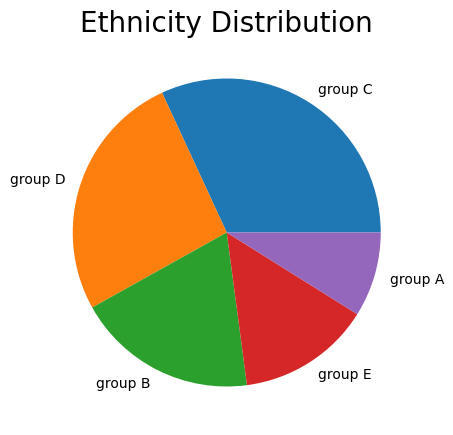

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5), dpi = 100)
plt.title("Ethnicity Distribution", size = 20)
plt.pie(x = pd.Series(df1['race/ethnicity']).value_counts().values,
        labels = df1['race/ethnicity'].value_counts().index)
plt.show()

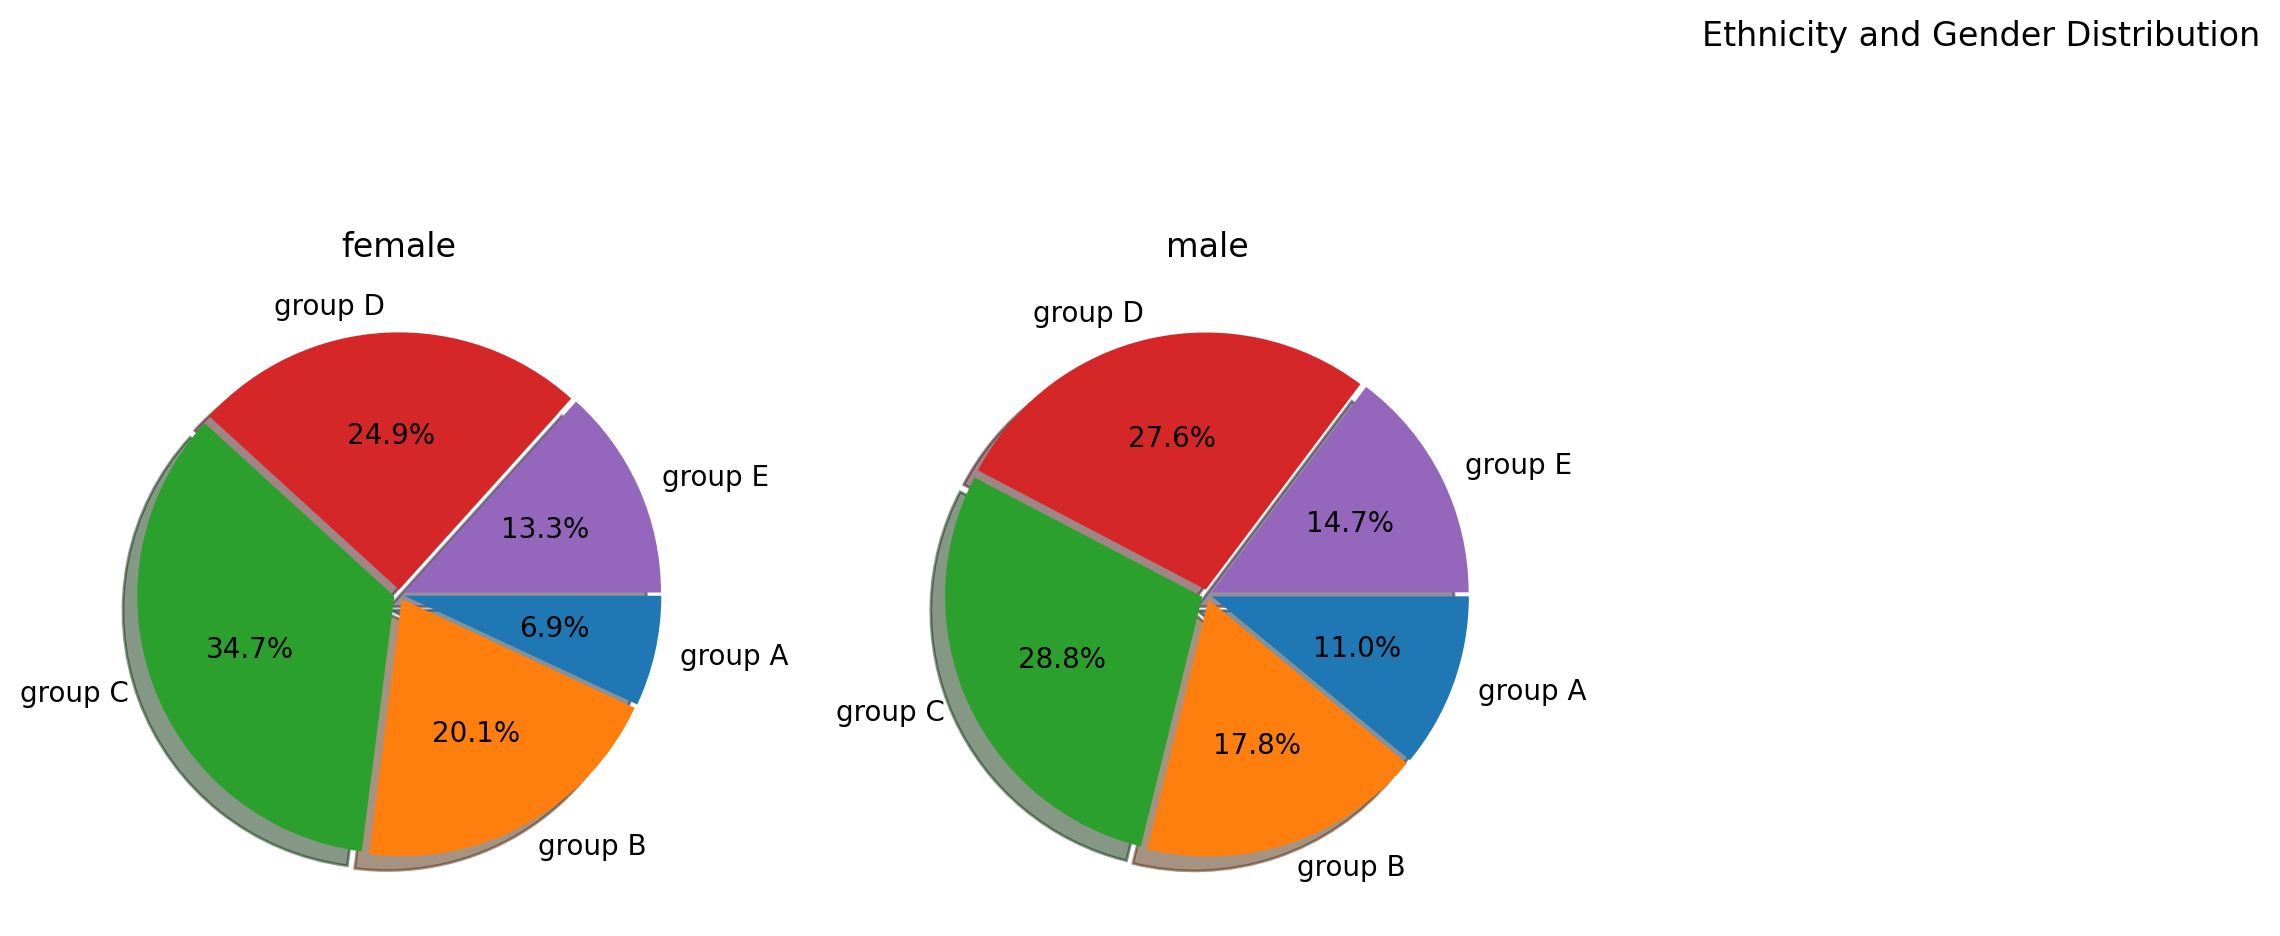

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols = 5, nrows = 2, figsize = (20, 10), dpi = 200)

fig.suptitle('Ethnicity and Gender Distribution')

# Get the grouped data for plotting
table = df1.groupby(['gender','race/ethnicity']).size().unstack()

# Flatten the axs array for easy iteration
axs_flat = axs.flatten()

for i, (gender, data) in enumerate(table.iterrows()):
    axs_flat[i].pie(x = data.values,
               labels = data.index,
               autopct='%0.1f%%',
               counterclock=False, shadow=True, explode=[0.02]*len(data.index))
    axs_flat[i].set_title(gender)

# Turn off any unused subplots
for i in range(len(table) , len(axs_flat)):
    fig.delaxes(axs_flat[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

# **Multi-variate Analysis**

In [ ]:
Hypothesis 1: High performers tend to be consistent across subjects (Math, Reading, Writing)

Binning recommended only for EDA. Not for identifying interaction effect of multiple variables. Most preferred code below

In [24]:
#create function for bins of 10 for reading and writing
df1['reading_score_bin'] = pd.cut(
    df1['reading score'],
    bins=range(0, 110, 10),
    labels=labels,
    right=False)
df1['writing_score_bin'] = pd.cut(
    df1['writing score'],
    bins=range(0, 110, 10),
    labels=labels,
    right=False)

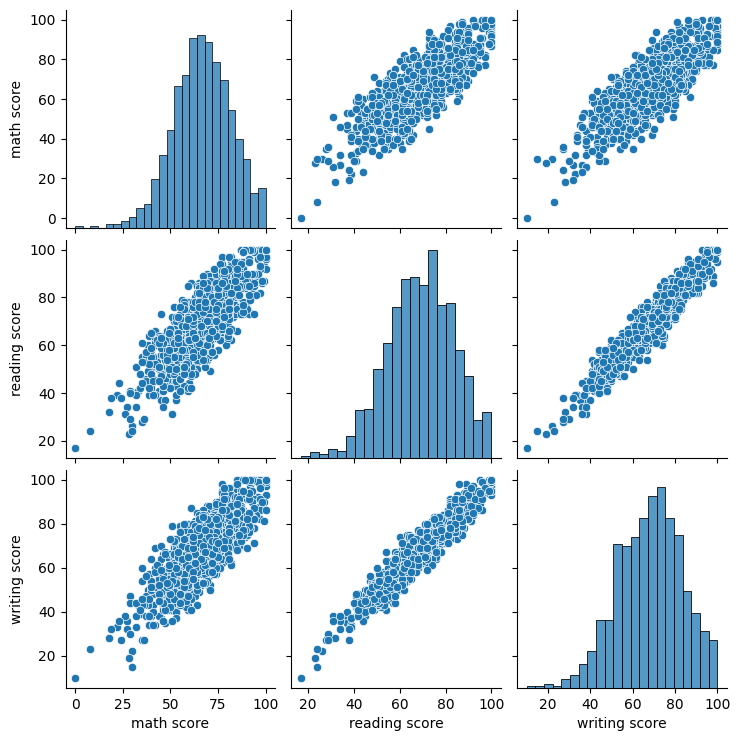

In [36]:
import seaborn as sns
sns.pairplot(df1[['math score','reading score','writing score']])

In [30]:
df1.assign(
    math_high = df1['math score'] > df1['math score'].mean(),
    reading_high = df1['reading score'] > df1['reading score'].mean(),
    writing_high = df1['writing score'] > df1['writing score'].mean()
).groupby(['math_high','reading_high','writing_high']).size()/len(df1)*100

math_high  reading_high  writing_high
False      False         False           36.5
                         True             3.0
           True          False            2.0
                         True             9.2
True       False         False            7.6
                         True             1.6
           True          False            2.7
                         True            37.4
dtype: float64

Insights - Multi-variate analysis


*   46.6% (37.4+9.2) students are high performers in math, reading and writing
*   36.5% students are low performers in math, reading and writing
*   Of the remaining 18% - Rare: 7.6% are students high performers in math only & Rare: 9.2% are high performers in reading and writing only
*   Remaining ~2%: 1.6% are high perfomers in math and writing only



In [17]:
#Number of students performing above average in Math and below average in both reading and writing
df1[(df1['math score']>df1['math score'].mean()) & (df1['reading score'] < df1['reading score'].mean()) & (df1['writing score'] < df1['writing score'].mean())]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,aggregate_score,math_score_bin
26,male,group B,some college,standard,none,69,54,55,178,60-69
51,male,group E,associate's degree,free/reduced,completed,77,69,68,214,70-79
65,male,group B,some high school,standard,none,67,64,61,192,60-69
83,male,group E,associate's degree,standard,none,72,64,63,199,70-79
100,male,group B,some college,standard,none,79,67,67,213,70-79
...,...,...,...,...,...,...,...,...,...,...
935,male,group D,some college,free/reduced,none,70,63,58,191,70-79
936,male,group A,associate's degree,standard,none,67,57,53,177,60-69
942,male,group C,high school,standard,none,81,66,64,211,80-89
955,male,group E,associate's degree,standard,none,72,57,62,191,70-79


Note

*   Correlation alone is not sufficient for this kind of multivariate analysis
*   Correlation measures the pairwise linear relationship between two variables at a time.



In [ ]:
#Find other patterns based on performance, and find what impacts Scores
df1.select_dtypes(include=['number']).corr()

,math score,reading score,writing score,aggregate_score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
aggregate_score,0.918746,0.970331,0.965667,1.000000


In [15]:
df1.select_dtypes(include=['number']).corr().style.background_gradient(cmap='viridis')

,math score,reading score,writing score,aggregate_score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
aggregate_score,0.918746,0.970331,0.965667,1.000000


In [19]:
(df1['parental level of education'].value_counts()/len(df1)*100).sort_values(ascending=False)

,count
parental level of education,
some college,22.6
associate's degree,22.2
high school,19.6
some high school,17.9
bachelor's degree,11.8
master's degree,5.9


Key insight
1. Literacy skills reinforce each other. Strong readers tend to be strong writers.
2. Math performance behaves differently from literacy

In [ ]:
df1['test preparation course'].value_counts()

,count
test preparation course,
none,642
completed,358


Of the 35% students who completed test preparation course performed better?
on mean level, test preparation has a positive effect on score

In [ ]:
#Test preparation has any impact on the score?
df1.groupby(['test preparation course']).aggregate(
    {'aggregate_score':['mean','sum'],
     'math score':['sum','mean'],
     'reading score':['sum','mean'],
     'writing score':['sum','mean']
     })

aggregate_score         math score             \
                                   mean     sum        sum       mean   
test preparation course                                                 
completed                    218.008380   78047      24951  69.695531   
none                         195.116822  125265      41138  64.077882   

                        reading score            writing score             
                                  sum       mean           sum       mean  
test preparation course                                                    
completed                       26454  73.893855         26642  74.418994  
none                            42715  66.534268         41412  64.504673

Hypothesis 3: Low performers often cluster roo
* Students below average in one subject are likely below average in others - 37.4% cases only
* These students are disproportionately from:
1. Free/reduced lunch
2. Lower parental education groups

In [41]:
#Students below average in one subject are likely below average in others
df1.assign(
    math_low = df1['math score'] < df1['math score'].mean(),
    reading_low = df1['reading score'] < df1['reading score'].mean(),
    writing_low = df1['writing score'] < df1['writing score'].mean()
).groupby(['math_low','reading_low','writing_low']).size()/len(df1)*100
#make above math_low, reading_low, writing_low column part of df
df1

math_low  reading_low  writing_low
False     False        False          37.4
                       True            2.7
          True         False           1.6
                       True            7.6
True      False        False           9.2
                       True            2.0
          True         False           3.0
                       True           36.5
dtype: float64


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_low,reading_low,writing_low
0,female,group B,bachelor's degree,standard,none,72,72,74,False,False,False
1,female,group C,some college,standard,completed,69,90,88,False,False,False
2,female,group B,master's degree,standard,none,90,95,93,False,False,False
3,male,group A,associate's degree,free/reduced,none,47,57,44,True,True,True
4,male,group C,some college,standard,none,76,78,75,False,False,False


In [50]:
df1['parental level of education'].value_counts()

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [63]:
#Low performers parental level of education
df1[(df1['math_low'] == True) | (df1['reading_low'] == True) | (df1['writing_low'] == True)]['parental level of education'].value_counts()

,count
parental level of education,
bachelor's degree,67
some college,135
master's degree,27
associate's degree,133
high school,144
some high school,120
Total,626


Insight - Students whose parents have lower levels of education are more likely to be low performers, while students whose parentts have bachelor's or master's degrees are more likely to perform well across math, reading and writing

Approach 2

In [89]:
import numpy as np
df1['aggregate_score_level'] = np.where(
    df1['aggregate_score'] > df1['aggregate_score'].mean(),
    'High',
    'Low'
)

In [91]:
pd.crosstab(
    df1['parental level of education'],
    df1['aggregate_score_level']
)

aggregate_score_level,High,Low
parental level of education,,
associate's degree,128,94
bachelor's degree,73,45
high school,79,117
master's degree,39,20
some college,122,104
some high school,85,94


In [92]:
pd.crosstab(
    df1['parental level of education'],
    df1['aggregate_score_level'],
    normalize='index'
) * 100


aggregate_score_level,High,Low
parental level of education,,
associate's degree,57.657658,42.342342
bachelor's degree,61.864407,38.135593
high school,40.306122,59.693878
master's degree,66.101695,33.898305
some college,53.982301,46.017699
some high school,47.486034,52.513966


Key Insights - Parental level of education (Multi-level gradient)

* Higher parental education -> higher chance of high performance
* Master's degree: 66.1% high, 33.9% low
* Bachelor's degree: 61.9% high, 38.1% low
* Associate's degree: 57.7% high, 42.3% low
-------------
* Clear positive relationship between parental education and student performance
-------------
* Lower parental education -> higher risk of low performance
* High school: 40.3% high, 59.7% low
* Some high school: 47.5% high, 52.5% low
* Students whose parents did not complete college are more likely to be low performers

Key Learning: Gradient here means a smooth, directional change in outcomes as one variable increases .

* The percentage of high performers steadily increases as parental education increases
* The percentage of low performers steadily decreases as parental education increases

* The consistent upward treend is what we call a "gradient". A gradient means "more of X is associated with more(or less) of Y, in a consistent pattern."

*Interesting Q*
* Does this help indentify a student's score independently?
* Partially - but not completely
* Each education group has a different probability of high vs. low performance
* Parental education independently helps estimate the likelihood of a student being a high or low performer.
* However, there is still overlap between groups (e.g., ~34% of students with master's degree parents are still low performers)
* Other factors (test prep, lunch, effort, **school quality**) also matter

In [52]:
df1['lunch'].value_counts()

,count
lunch,
standard,645
free/reduced,355


In [67]:
#Low performers lunch
df1[(df1['math_low'] == True) | (df1['reading_low'] == True) | (df1['writing_low'] == True)]['lunch'].value_counts()

,count
lunch,
standard,352
free/reduced,274


*  Students receiving free/reduced lunch are more likely to be low perfomers compared to students receiving a standard lunch.
*  This suggests a strong association between socioeconomic status and academic performance.

Hypothesis 4: Interaction effects (important insight)

* Some effects compound:
* Examples:
* Free/reduced lunch + no test prep -> lowest average scores
* Standard lunch + test prep -> highest average scores

Interpretation: Interventions (like test prep) can partially offset socioeconomic disadvantages.

In [82]:
df1.groupby(['lunch', 'test preparation course']).agg({'aggregate_score':'mean'})

aggregate_score
lunch        test preparation course                 
free/reduced completed                     203.267176
             none                          176.848214
standard     completed                     226.515419
             none                          204.906699

Key Insights - Test prep (Binary gradient)
*  Test prep significantly boosts scores regardless of lunch type (Check mean values)
###  **But it is especially powerful for students from disadvantaged backgrounds, helping narrow(226 vs. 203: +23 pts.) though not fully close the performance gap.**
*  Test preparation can independently help predict a student's score, evidence above.

* Note: Performance is systematic, not random (evidence/Insights above)